In [3]:
from main import *

import seaborn as sns
from scipy.stats import zscore, mannwhitneyu

# Overview of the figure

- **Panel a**: Schematize the experiment (done externally, not using Python)
- **Panel b**: Display an example microscopy image
- **Panel c**: Display a few example time series of neuronal activity
- **Panel d**: Display a raster plot of the activity of all neurons
- **Panel e**: Plot the correlation-distance curves of control and mutant fish
- **Panel f**: Quantify differences in local correlations
- **Panel g**: Quantify differences in distant correlations

# 1. Loading data

In [5]:
# Loading data
timeseries = np.load('Data/timeseries.npy') # Single-neuron activity
frame = np.load('Data/frame.npy') # Example microscopy image
ratio = frame.shape[0] / frame.shape[1] # Height / width ratio of the image

# Loading results
order = np.load('Results/figure1_rastermap_sorting.npy') # Sorting for visualization of neuronal activity
curves_control = np.load('Results/figure1_correlation_curves_control.npy') # Correlation curves, control animals
curves_mutant = np.load('Results/figure1_correlation_curves_mutant.npy') # Correlation curves, mutant animals
x = np.linspace(0, 300, 30, endpoint=True)

# Computing simple results
values1_control = np.mean(curves_control[:, :5], axis=1) # Average local (<50 microns) correlations
values1_mutant = np.mean(curves_mutant[:, :5], axis=1)
values2_control = np.mean(curves_control[:, -5:], axis=1) # Average distant (>250 microns) correlations
values2_mutant = np.mean(curves_mutant[:, -5:], axis=1)

# 2. Generating figure

#### 2.1 Generating independent graphs

In [6]:
%matplotlib inline

#### 2.2 Custom `paperfig` package

Global parameters

Rendering the figure

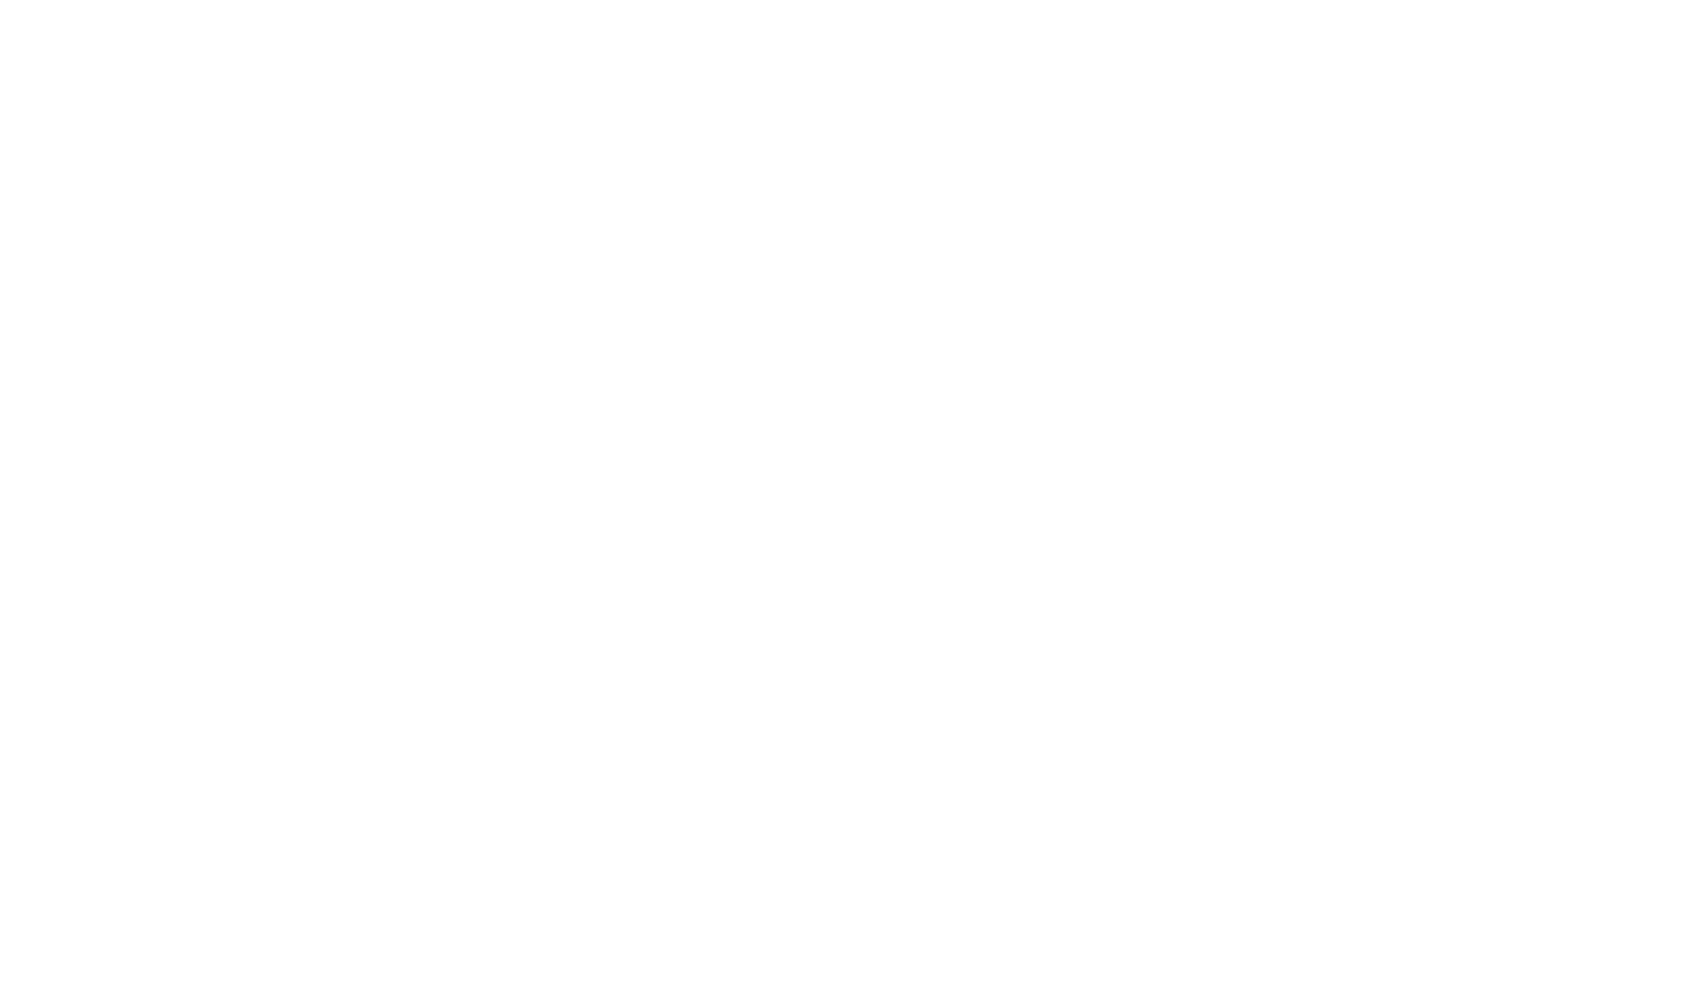

In [7]:
fig = Figure(figsize=(7, 4), dpi=300)

# Global parameters --------------------------------------------------------------------------------

fig.set_tick_length(2)
fig.set_font_size(6)
fig.add_background()

# Setting up axes ----------------------------------------------------------------------------------

# Add axes here

fig.set_line_thickness(0.5)

# Filling axes -------------------------------------------------------------------------------------

# Plot things here

# Displaying ---------------------------------------------------------------------------------------

fig.show()

Saving

In [8]:
fig.save('Figures/figure1_incomplete.svg')

# 3. Statistics & other manually indicated values

#### Statistical test #1:

In [348]:
mannwhitneyu(values1_control, values1_mutant)

MannwhitneyuResult(statistic=164.0, pvalue=4.331644493439206e-05)

#### Statistical test #2

In [349]:
mannwhitneyu(values2_control, values2_mutant)

MannwhitneyuResult(statistic=76.0, pvalue=0.6996756256347049)

#### Number of neurons and time steps

In [350]:
timeseries.shape

(4096, 3257)

#### Number of animals per experimental group

In [13]:
curves_control.shape[0]

12

In [14]:
curves_mutant.shape[0]

14